## Algorithm
1. Choose N clusters
2. Calculate N xn distances for each data point to each center
3. Assign the closest center
4. Calcule the mean location of the points in each of N cluster to create New Center

In [1]:
import numpy as np
import pylab as pl
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
np.random.seed(123)
#create two distributions of data points
#random guassian random point on each dimension
d1 =np.random.randn(100,2) #this will give us a two dimensional array
#can this be explained???
d2 = 2 * np.random.randn(100,2) +5

In [10]:
d1.shape 

(100, 2)

In [11]:
d2.shape # we have a 100 by 2 dimensional array. we take everything along the first axis and only one on the other axis

(100, 2)

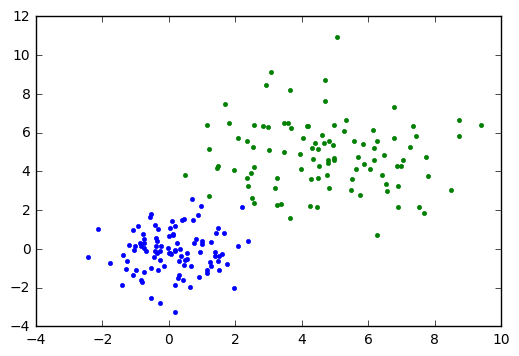

In [12]:
pl.plot(d1[:,0], d1[:,1],'.')
pl.plot(d2[:,0], d2[:,1],'.')

In [16]:
nc = 2
#rand is guassian and randn in uniform
init_c1 = np.random.rand(2)
init_c2 = 5*np.random.rand(2)
print init_c1, init_c2
#randu, lets generate two points between 0 and 1 and 

[ 0.85154805  0.12761222] [ 4.46932684  2.48253986]


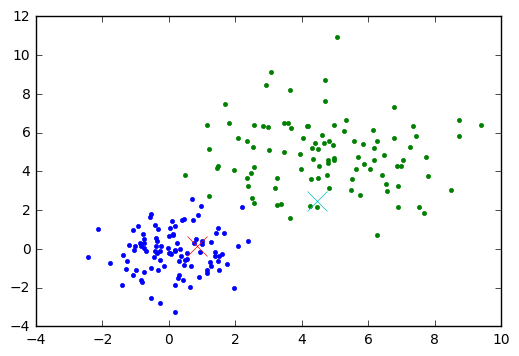

In [22]:
pl.plot(d1[:,0], d1[:,1],'.')
pl.plot(d2[:,0], d2[:,1],'.')
pl.plot(init_c1[0], init_c1[1],'x', ms =15)
pl.plot(init_c2[0], init_c2[1],'x', ms =15)

In [28]:
#important in clustering to define the distance
#we want a function that works for bulk, take array that has 100 data points, each two dimensions, calculate the distance between
#each on eof those and the number I am passing as an argument.
def distance(p1,p2):
    return np.abs(p1[:,0]-p2[0])+np.abs(p1[:,1]-p2[1])
distance(np.array([[0,1],[0,1]]),[1,1])

array([1, 1])

In [31]:
s11 = distance(d1, init_c1)
s12 = distance(d1, init_c1)
s21 = distance(d2, init_c2)
s22 = distance(d2, init_c2)
print s11, s12, s21, s22

[ 2.80691188  2.20247649  2.95397262  3.83475215  1.40874083  1.7527554
  1.4063558   1.85749351  3.4135559   0.41108002  1.47729928  2.83559874
  2.87079245  1.61185007  1.98098389  4.03336875  3.45057061  0.37716229
  1.40931262  1.88709949  3.51219629  1.68864148  0.65240172  1.82611715
  2.23771907  3.31203381  1.81783913  1.76356857  1.6664323   1.58587653
  2.29150721  1.99115374  1.24537531  1.16676226  2.12176105  1.34187614
  1.53547127  3.88676327  1.5085559   3.42263976  1.22017053  1.4891004
  2.37982082  2.92414539  1.27239431  1.69362176  1.72076264  2.09006105
  3.42719973  0.9789361   2.31499352  2.60997512  0.96964413  2.6615865
  2.15842338  2.39448497  1.96040177  0.31231963  2.68258402  3.26052128
  1.80705436  1.35140408  1.15498753  0.41133464  1.06873691  3.07652486
  1.80205961  0.28645528  3.07886103  1.14892991  1.67758219  0.62090335
  0.63469169  1.81220938  1.10691234  0.75384471  4.26791781  1.91153319
  0.95597867  0.79649763  1.15280815  1.29438311  1.21

In [32]:
#which ones are closer to center one than center two?
s11 < s12

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [33]:
#this tells me that the true data points do not belong with the others
assign1 = s11 < s12
assign2 = s21 < s22

In [34]:
assign2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [40]:
#orig data, take the dat points from the other array
#concatnate just puts together two arrays
d1new = np.concatenate([d1[assign1], d2[assign2]])
d1new.shape

(0, 2)

In [41]:
d2new = np.concatenate([d1[~assign1], d2[~assign2]])
d1new.shape

(0, 2)

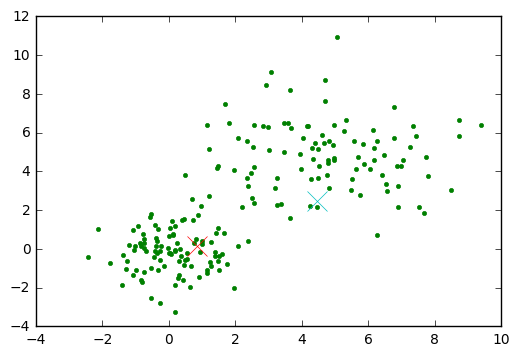

In [43]:
pl.plot(d1new[:,0], d1new[:,1],'.')
pl.plot(d2new[:,0], d2new[:,1],'.')
pl.plot(init_c1[0], init_c1[1],'x', ms =15)
pl.plot(init_c2[0], init_c2[1],'x', ms =15)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


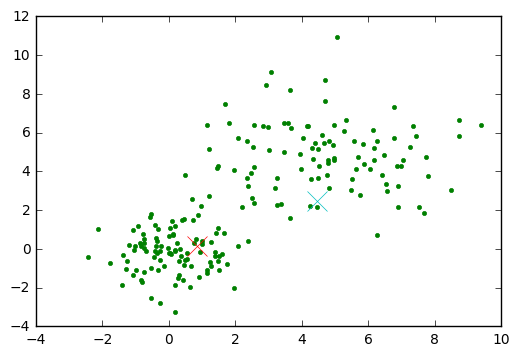

In [44]:
c1new = np.mean(d1new, axis=0)
c2new = np.mean(d2new, axis=0)
pl.plot(d1new[:,0], d1new[:,1],'.')
pl.plot(d2new[:,0], d2new[:,1],'.')
pl.plot(init_c1[0], init_c1[1],'x', ms =15)
pl.plot(init_c2[0], init_c2[1],'x', ms =15)